<h1>Coursera Capstone Project</h1>
<h3>Sebastian Pavez</h3>
<p>This notebook will be focused on working on the final assignment of the IBM Data Science Certificate. The idea is to apply all the knowledge acquired along the different courses on a final project. This project will be about predicting the severity of an accident.</p>

# Importing Libraries

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
from scipy.stats import f_oneway
import matplotlib.pyplot as plt

# Getting the Dataset

In [149]:
#Getting the CSV file into a Dataframe
path = "https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"
df = pd.read_csv(path)

In [150]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [151]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


<h3>Selecting the attributes of interest</h3>

In [152]:
#Target variable will be SEVERITYCODE and the Independent Attributes will be related to weather and road conditions, that is:
#INCKEY, ADDRTYPE, COLLISIONTYPE, INCDTTM, JUNCTIONTYPE, SDOT_COLDESC, UNDERINFL, WEATHER, ROADCOND, LIGHTCOND
df_col = df[['JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SEVERITYCODE']]
df_col.head()

,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE
0,At Intersection (intersection related),Overcast,Wet,Daylight,2
1,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,1
2,Mid-Block (not related to intersection),Overcast,Dry,Daylight,1
3,Mid-Block (not related to intersection),Clear,Dry,Daylight,1
4,At Intersection (intersection related),Raining,Wet,Daylight,2


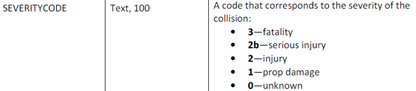

In [153]:
df_col['SEVERITYCODE'].replace(to_replace=[1,2],value=['prop damage','injury'],inplace=True)
df_col.head()

,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE
0,At Intersection (intersection related),Overcast,Wet,Daylight,injury
1,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,prop damage
2,Mid-Block (not related to intersection),Overcast,Dry,Daylight,prop damage
3,Mid-Block (not related to intersection),Clear,Dry,Daylight,prop damage
4,At Intersection (intersection related),Raining,Wet,Daylight,injury


In [154]:
df_col.describe(include='all')

,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE
count,188344,189592,189661,189503,194673
unique,7,11,9,9,2
top,Mid-Block (not related to intersection),Clear,Dry,Daylight,prop damage
freq,89800,111135,124510,116137,136485


In [155]:
df_col['SEVERITYCODE'].value_counts()

prop damage    136485
injury          58188
Name: SEVERITYCODE, dtype: int64

# Inspecting the attributes

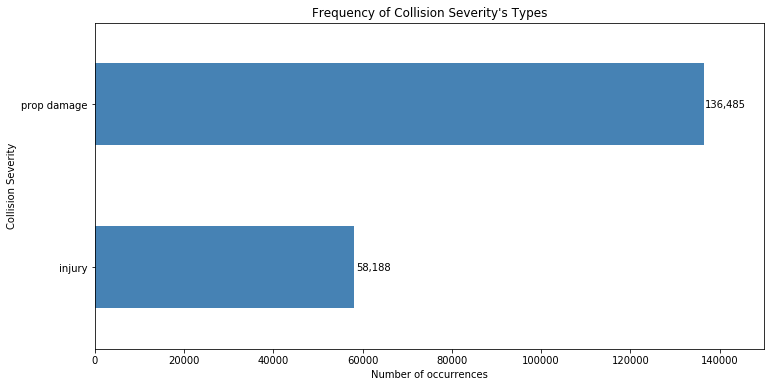

In [156]:
xmin=0
xmax=150000
df_col['SEVERITYCODE'].value_counts().sort_values().plot(kind='barh', figsize=(12, 6), color='steelblue', xlim=(xmin, xmax))

plt.xlabel('Number of occurrences')
plt.ylabel('Collision Severity') 
plt.title("Frequency of Collision Severity's Types") 

# annotate value for each case
for index, value in enumerate(df_col['SEVERITYCODE'].value_counts().sort_values()): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar
    plt.annotate(label, xy=(value+300, index-.02))

plt.show()

In [157]:
df_col['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

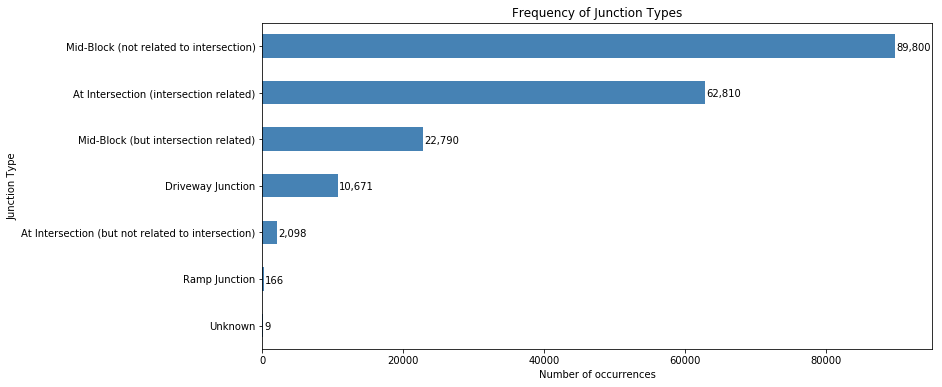

In [158]:
xmin=0
xmax=95000
df_col['JUNCTIONTYPE'].value_counts().sort_values().plot(kind='barh', figsize=(12, 6), color='steelblue', xlim=(xmin, xmax))

plt.xlabel('Number of occurrences')
plt.ylabel('Junction Type') 
plt.title('Frequency of Junction Types') 

# annotate value for each case
for index, value in enumerate(df_col['JUNCTIONTYPE'].value_counts().sort_values()): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar
    plt.annotate(label, xy=(value+200, index-.09))

plt.show()

In [159]:
df_col['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

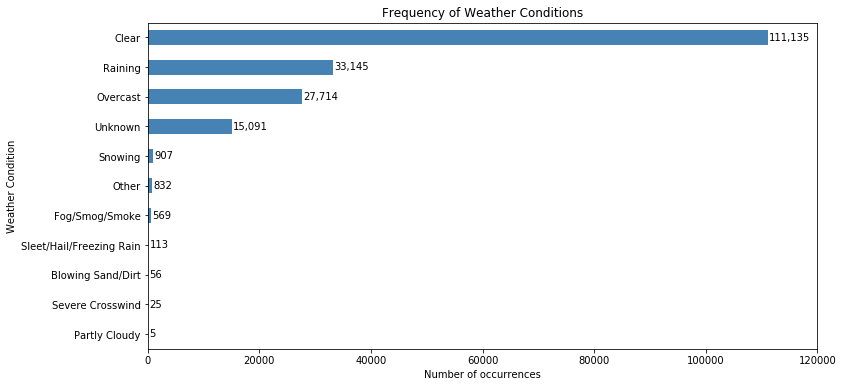

In [160]:
xmin=0
xmax=120000
df_col['WEATHER'].value_counts().sort_values().plot(kind='barh', figsize=(12, 6), color='steelblue', xlim=(xmin, xmax))

plt.xlabel('Number of occurrences')
plt.ylabel('Weather Condition') 
plt.title('Frequency of Weather Conditions') 

# annotate value for each case
for index, value in enumerate(df_col['WEATHER'].value_counts().sort_values()): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar
    plt.annotate(label, xy=(value+200, index-.09))

plt.show()

In [161]:
df_col['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

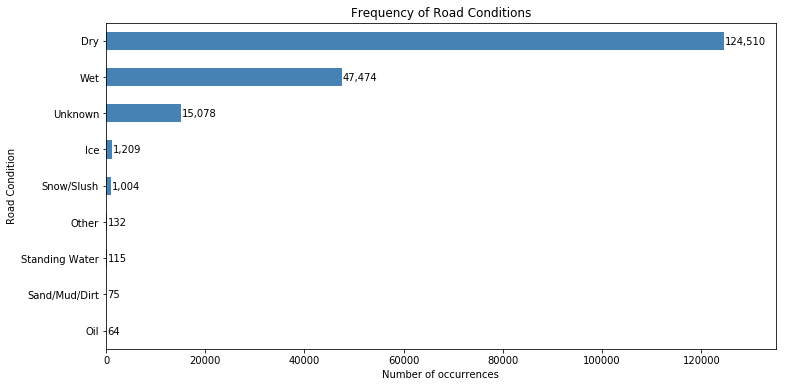

In [162]:
xmin=0
xmax=135000
df_col['ROADCOND'].value_counts().sort_values().plot(kind='barh', figsize=(12, 6), color='steelblue', xlim=(xmin, xmax))

plt.xlabel('Number of occurrences')
plt.ylabel('Road Condition') 
plt.title('Frequency of Road Conditions') 

# annotate value for each case
for index, value in enumerate(df_col['ROADCOND'].value_counts().sort_values()): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar
    plt.annotate(label, xy=(value+200, index-.09))

plt.show()

In [163]:
df_col['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

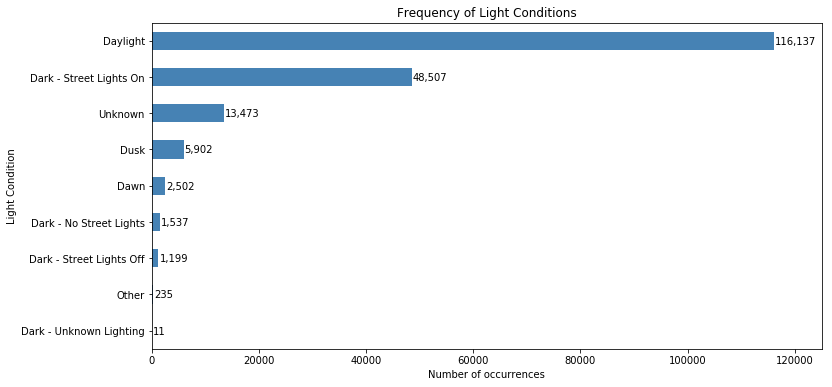

In [164]:
xmin=0
xmax=125000
df_col['LIGHTCOND'].value_counts().sort_values().plot(kind='barh', figsize=(12, 6), color='steelblue', xlim=(xmin, xmax))

plt.xlabel('Number of occurrences')
plt.ylabel('Light Condition') 
plt.title('Frequency of Light Conditions') 

# annotate value for each case
for index, value in enumerate(df_col['LIGHTCOND'].value_counts().sort_values()): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar
    plt.annotate(label, xy=(value+200, index-.09))

plt.show()

In [165]:
#Work on missing values and balance the target
df_col.replace('Unknown', np.nan, inplace =True)
missing_data = df_col.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

JUNCTIONTYPE
False    188335
True       6338
Name: JUNCTIONTYPE, dtype: int64

WEATHER
False    174501
True      20172
Name: WEATHER, dtype: int64

ROADCOND
False    174583
True      20090
Name: ROADCOND, dtype: int64

LIGHTCOND
False    176030
True      18643
Name: LIGHTCOND, dtype: int64

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64



So, we will drop the missing data for Junctiontype. In some cases the missing values apply for more than one attribute. In that way would be better to drop the entire row. On top of that, some data balancing should be performed and therefore now could be a good way of starting balancing it

In [166]:
df_col = df_col.dropna(subset=["JUNCTIONTYPE"], axis=0)
df_col = df_col.dropna(subset=["WEATHER"], axis=0)
df_col = df_col.dropna(subset=["ROADCOND"], axis=0)
df_col = df_col.dropna(subset=["LIGHTCOND"], axis=0)

# reset index, because we droped two rows
df_col.reset_index(drop=True, inplace=True)

In [167]:
missing_data = df_col.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

JUNCTIONTYPE
False    167997
Name: JUNCTIONTYPE, dtype: int64

WEATHER
False    167997
Name: WEATHER, dtype: int64

ROADCOND
False    167997
Name: ROADCOND, dtype: int64

LIGHTCOND
False    167997
Name: LIGHTCOND, dtype: int64

SEVERITYCODE
False    167997
Name: SEVERITYCODE, dtype: int64



In [168]:
df_col['SEVERITYCODE'].value_counts()

prop damage    112482
injury          55515
Name: SEVERITYCODE, dtype: int64

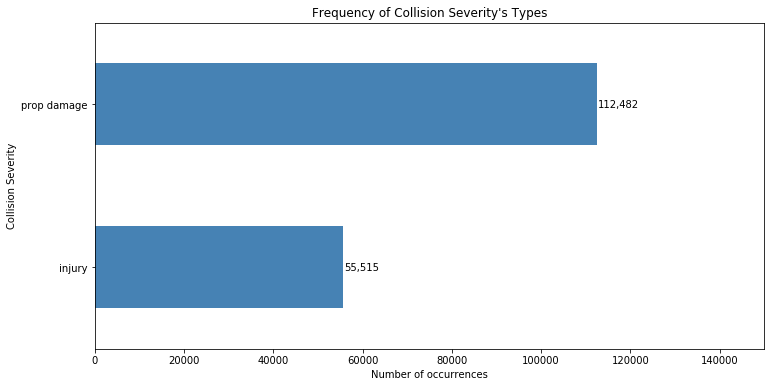

In [169]:
xmin=0
xmax=150000
df_col['SEVERITYCODE'].value_counts().sort_values().plot(kind='barh', figsize=(12, 6), color='steelblue', xlim=(xmin, xmax))

plt.xlabel('Number of occurrences')
plt.ylabel('Collision Severity') 
plt.title("Frequency of Collision Severity's Types") 

# annotate value for each case
for index, value in enumerate(df_col['SEVERITYCODE'].value_counts().sort_values()): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar
    plt.annotate(label, xy=(value+300, index-.02))

plt.show()

In [170]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df_col[df_col.SEVERITYCODE=='prop damage']
df_minority = df_col[df_col.SEVERITYCODE=='injury']
#f_majority = df_col[df_col.SEVERITYCODE==1]
#f_minority = df_col[df_col.SEVERITYCODE==2]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=55515,     # to match minority class
                                 random_state=0) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.SEVERITYCODE.value_counts()

injury         55515
prop damage    55515
Name: SEVERITYCODE, dtype: int64

In [171]:
df_downsampled.reset_index(drop=True, inplace=True)
#df_downsampled["SEVERITYCODE"] = df_downsampled["SEVERITYCODE"].astype("str")
df_downsampled.head(10)

,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE
0,Mid-Block (not related to intersection),Clear,Dry,Daylight,prop damage
1,Driveway Junction,Clear,Dry,Daylight,prop damage
2,Mid-Block (not related to intersection),Clear,Dry,Daylight,prop damage
3,Driveway Junction,Clear,Dry,Daylight,prop damage
4,Mid-Block (not related to intersection),Clear,Dry,Daylight,prop damage
5,Mid-Block (not related to intersection),Raining,Wet,Daylight,prop damage
6,Mid-Block (but intersection related),Clear,Dry,Daylight,prop damage
7,Mid-Block (not related to intersection),Clear,Dry,Dawn,prop damage
8,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,prop damage
9,Mid-Block (not related to intersection),Clear,Dry,Daylight,prop damage


In [172]:
all(isinstance(column, str) for column in df_downsampled.columns)

True

In [173]:
df_downsampled.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True)

WEATHER                   SEVERITYCODE
Blowing Sand/Dirt         injury          0.500000
                          prop damage     0.500000
Clear                     prop damage     0.500303
                          injury          0.499697
Fog/Smog/Smoke            prop damage     0.513298
                          injury          0.486702
Other                     prop damage     0.515528
                          injury          0.484472
Overcast                  prop damage     0.508443
                          injury          0.491557
Partly Cloudy             injury          0.750000
                          prop damage     0.250000
Raining                   injury          0.511994
                          prop damage     0.488006
Severe Crosswind          injury          0.500000
                          prop damage     0.500000
Sleet/Hail/Freezing Rain  prop damage     0.578125
                          injury          0.421875
Snowing                   prop damage     0

In [174]:
df_downsampled.groupby(['JUNCTIONTYPE'])['SEVERITYCODE'].value_counts(normalize=True)

JUNCTIONTYPE                                       SEVERITYCODE
At Intersection (but not related to intersection)  injury          0.513237
                                                   prop damage     0.486763
At Intersection (intersection related)             injury          0.616178
                                                   prop damage     0.383822
Driveway Junction                                  prop damage     0.517777
                                                   injury          0.482223
Mid-Block (but intersection related)               injury          0.502265
                                                   prop damage     0.497735
Mid-Block (not related to intersection)            prop damage     0.604354
                                                   injury          0.395646
Ramp Junction                                      injury          0.500000
                                                   prop damage     0.500000
Name: SEVERITYCODE, dtyp

In [175]:
df_downsampled.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True)

ROADCOND        SEVERITYCODE
Dry             prop damage     0.500986
                injury          0.499014
Ice             prop damage     0.606287
                injury          0.393713
Oil             injury          0.585366
                prop damage     0.414634
Other           injury          0.591549
                prop damage     0.408451
Sand/Mud/Dirt   prop damage     0.511628
                injury          0.488372
Snow/Slush      prop damage     0.690476
                injury          0.309524
Standing Water  prop damage     0.552239
                injury          0.447761
Wet             injury          0.507834
                prop damage     0.492166
Name: SEVERITYCODE, dtype: float64

In [176]:
df_downsampled.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize=True)

LIGHTCOND                 SEVERITYCODE
Dark - No Street Lights   prop damage     0.624264
                          injury          0.375736
Dark - Street Lights Off  prop damage     0.566996
                          injury          0.433004
Dark - Street Lights On   prop damage     0.527295
                          injury          0.472705
Dark - Unknown Lighting   injury          0.666667
                          prop damage     0.333333
Dawn                      injury          0.502183
                          prop damage     0.497817
Daylight                  injury          0.512727
                          prop damage     0.487273
Dusk                      injury          0.509978
                          prop damage     0.490022
Other                     prop damage     0.581197
                          injury          0.418803
Name: SEVERITYCODE, dtype: float64

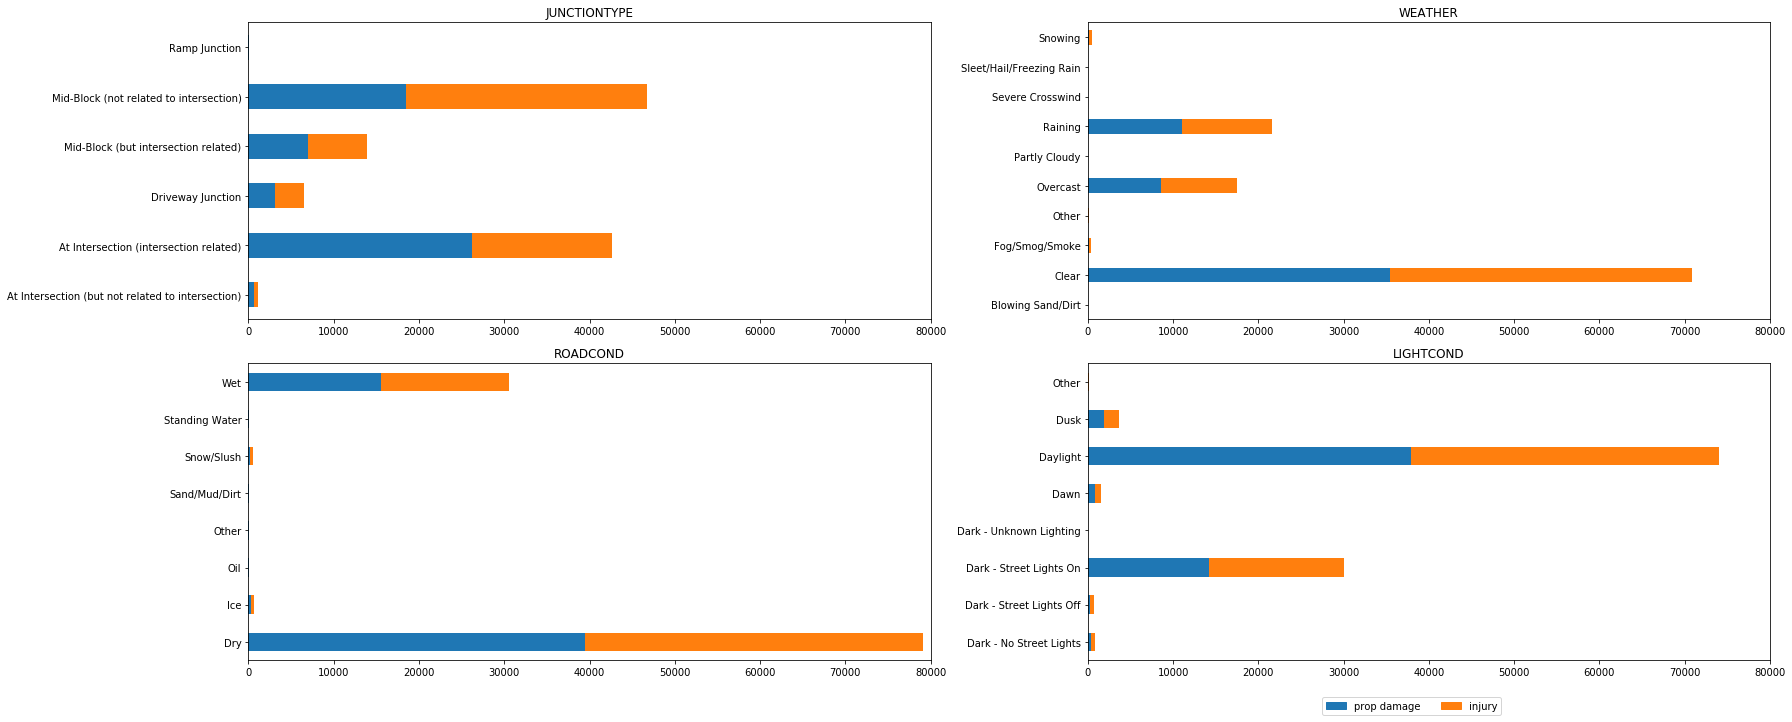

In [177]:
import matplotlib.patches as mpatches
A = ['JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']
axes = ['ax0','ax1','ax2','ax3']
fig = plt.figure() # create figure

xmin=0
xmax=80000

for i,col in enumerate(A):
    axes[i] = fig.add_subplot(2, 2, i+1)
    ax = df_downsampled.groupby([col,'SEVERITYCODE']).size().unstack().plot(kind='barh',
                                                                            figsize=(25, 10),
                                                                            stacked=True,
                                                                            ax=axes[i],
                                                                            legend=None,
                                                                            xlim=(xmin, xmax))
    ax.yaxis.set_label_text("")
    ax.set_title(col)

patch1 = mpatches.Patch(color='#1f77b4', label='prop damage')
patch2 = mpatches.Patch(color='#ff7f0e', label='injury')
plt.legend(handles=[patch1, patch2], loc='lower center', 
           ncol=2,
           bbox_to_anchor=(0., -0.2, 0.95, .1))

fig.tight_layout()

In [178]:
junction = list(df_downsampled['JUNCTIONTYPE'].unique())
weather = list(df_downsampled['WEATHER'].unique())
road = list(df_downsampled['ROADCOND'].unique())
light = list(df_downsampled['LIGHTCOND'].unique())

In [179]:
df_downsampled.head()

,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE
0,Mid-Block (not related to intersection),Clear,Dry,Daylight,prop damage
1,Driveway Junction,Clear,Dry,Daylight,prop damage
2,Mid-Block (not related to intersection),Clear,Dry,Daylight,prop damage
3,Driveway Junction,Clear,Dry,Daylight,prop damage
4,Mid-Block (not related to intersection),Clear,Dry,Daylight,prop damage


# Anova

In [180]:
a = [junction, weather, road, light]
df1 = df_downsampled.copy()
df1['SEVERITYCODE'].replace(to_replace=['prop damage','injury'],value=[1,2],inplace=True)
for i,col in enumerate(A):
    grouped=df1[[col, 'SEVERITYCODE']].groupby([col])
    element = a[i]
    b = (grouped.get_group(element[j])['SEVERITYCODE'] for j in range(len(element)))
    f_val, p_val = f_oneway(*b)
    print( "ANOVA results for", col,": F=", f_val, ", P =", p_val)

ANOVA results for JUNCTIONTYPE : F= 904.4494638987372 , P = 0.0
ANOVA results for WEATHER : F= 7.856894208404653 , P = 1.1140455856386026e-11
ANOVA results for ROADCOND : F= 16.509601395761464 , P = 6.586534377192698e-22
ANOVA results for LIGHTCOND : F= 29.759051858880685 , P = 2.1817300964796972e-41


<h3>ANOVA Results</h3>

| Attribute    |    F    |    P     |
|--------------|---------|----------|
| JUNCTIONTYPE | 904.44  | 0.0      |
| WEATHER      | 7.86    | 1.11e-11 |
| ROADCOND     | 16.51   | 6.59e-22 | 
| LIGHTCOND    | 29.76   | 2.18e-41 | 

This is a great result, with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance.

# Convert categorical features to numerical values

In [184]:
X = df_downsampled[['JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']].values

In [185]:
from sklearn import preprocessing
junctionLabel = preprocessing.LabelEncoder()
junctionLabel.fit(junction)
X[:,0] = junctionLabel.transform(X[:,0]) 

weatherLabel = preprocessing.LabelEncoder()
weatherLabel.fit(weather)
X[:,1] = weatherLabel.transform(X[:,1]) 

roadLabel = preprocessing.LabelEncoder()
roadLabel.fit(road)
X[:,2] = roadLabel.transform(X[:,2]) 

lightLabel = preprocessing.LabelEncoder()
lightLabel.fit(light)
X[:,3] = lightLabel.transform(X[:,3]) 

In [186]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:10]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 1.03404585, -0.71162757, -0.6268147 ,  0.59702353],
       [-0.40781221, -0.71162757, -0.6268147 ,  0.59702353],
       [ 1.03404585, -0.71162757, -0.6268147 ,  0.59702353],
       [-0.40781221, -0.71162757, -0.6268147 ,  0.59702353],
       [ 1.03404585, -0.71162757, -0.6268147 ,  0.59702353],
       [ 1.03404585,  1.67876418,  1.61186889,  0.59702353],
       [ 0.31311682, -0.71162757, -0.6268147 ,  0.59702353],
       [ 1.03404585, -0.71162757, -0.6268147 , -0.1012029 ],
       [ 1.03404585,  1.67876418,  1.61186889, -1.49765575],
       [ 1.03404585, -0.71162757, -0.6268147 ,  0.59702353]])

In [187]:
y = df_downsampled['SEVERITYCODE']
y[0:10]

0    prop damage
1    prop damage
2    prop damage
3    prop damage
4    prop damage
5    prop damage
6    prop damage
7    prop damage
8    prop damage
9    prop damage
Name: SEVERITYCODE, dtype: object

<h1>MODELLING</h1>

In [188]:
from sklearn.model_selection import train_test_split

In [189]:
from sklearn.tree import DecisionTreeClassifier

<h2>Generating Trainining and Testing set</h2>

In [190]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=3)
print ('Train set:', X_trainset.shape,  y_trainset.shape)
print ('Test set:', X_testset.shape,  y_testset.shape)

Train set: (88824, 4) (88824,)
Test set: (22206, 4) (22206,)


In [191]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
Tree 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [192]:
Tree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [193]:
predTree = Tree.predict(X_testset)

In [194]:
print (predTree [0:5])
print (y_testset [0:5])

['prop damage' 'prop damage' 'injury' 'injury' 'injury']
123       prop damage
38154     prop damage
110888         injury
45015     prop damage
54014     prop damage
Name: SEVERITYCODE, dtype: object


In [195]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.5934432135458885


from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(drugTree, 
                feature_names=df_downsampled.columns[0:4],
                class_names=np.unique(y_trainset),  
                filled=True, rounded=True)

!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

In [196]:
import graphviz 
import pydotplus
import matplotlib.image as mpimg

ModuleNotFoundError: No module named 'graphviz'

In [197]:
plt.figure(figsize=(10, 20))
dot_data = tree.export_graphviz(Tree, out_file=None) 
graph = graphviz.Source(dot_data) 

dot_data = tree.export_graphviz(Tree, out_file=None, 
                      feature_names=df_downsampled.columns[0:4],  
                      class_names=np.unique(y_trainset),  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

NameError: name 'tree' is not defined

<Figure size 720x1440 with 0 Axes>

plt.figure(figsize=(10, 20))
dot_data = tree.export_graphviz(Tree, out_file=None) 
graph = graphviz.Source(dot_data) 

dot_data = tree.export_graphviz(Tree, out_file=None, 
                      feature_names=df_downsampled.columns[0:4],  
                      class_names=np.unique(y_trainset),  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("drugtree.png")
img = mpimg.imread("drugtree.png")
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

<h2>K Nearest Neighbor(KNN)</h2>

In [198]:
from sklearn.neighbors import KNeighborsClassifier
Ks=15
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_trainset,y_trainset)
    yhat = kNN_model.predict(X_testset)
    
    
    mean_acc[n-1]=np.mean(yhat==y_testset);
    
    std_acc[n-1]=np.std(yhat==y_testset)/np.sqrt(yhat.shape[0])
mean_acc

array([0.55669639, 0.56291092, 0.55791228, 0.55998379, 0.56201027,
       0.56322616, 0.56169504, 0.56223543, 0.56642349, 0.56741421,
       0.57322345, 0.57664595, 0.57597046, 0.57497974])

In [199]:
print("The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.5766459515446276 with k= 12


In [200]:
k = 12
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_trainset,y_trainset)
kNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=12, p=2,
           weights='uniform')

<h2>Decision Tree</h2>

In [201]:
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT_model.fit(X_trainset,y_trainset)
DT_model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [202]:
yhat = DT_model.predict(X_testset)
yhat

array(['injury', 'prop damage', 'injury', ..., 'injury', 'injury',
       'injury'], dtype=object)

<h2>Support Vector Machine (SVM)</h2>

In [203]:
from sklearn import svm
SVM_model = svm.SVC()
SVM_model.fit(X_trainset, y_trainset) 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [204]:
yhat = SVM_model.predict(X_testset)
yhat

array(['injury', 'prop damage', 'injury', ..., 'injury', 'injury',
       'injury'], dtype=object)

<h2>Logistic Regression</h2>

In [205]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01).fit(X_trainset,y_trainset)
LR_model

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [206]:
yhat = LR_model.predict(X_testset)
yhat

array(['injury', 'prop damage', 'injury', ..., 'injury', 'injury',
       'injury'], dtype=object)

# Model Evaluation using Test set

In [207]:
from sklearn.metrics import jaccard_similarity_score
#from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [208]:
knn_yhat = kNN_model.predict(X_testset)
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_testset, knn_yhat))
#print("KNN Jaccard index: %.2f" % jaccard_score(y_testset, knn_yhat, average='weighted'))
print("KNN F1-score: %.2f" % f1_score(y_testset, knn_yhat, average='weighted') )

KNN Jaccard index: 0.58
KNN F1-score: 0.58


In [209]:
DT_yhat = DT_model.predict(X_testset)
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_testset, DT_yhat))
#print("DT Jaccard index: %.2f" % jaccard_score(y_testset, DT_yhat, average='weighted'))
print("DT F1-score: %.2f" % f1_score(y_testset, DT_yhat, average='weighted') )

KNN Jaccard index: 0.59
DT F1-score: 0.59


In [210]:
SVM_yhat = SVM_model.predict(X_testset)
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_testset, SVM_yhat))
#print("SVM Jaccard index: %.2f" % jaccard_score(y_testset, SVM_yhat, average='weighted'))
print("SVM F1-score: %.2f" % f1_score(y_testset, SVM_yhat, average='weighted') )

KNN Jaccard index: 0.59
SVM F1-score: 0.59


In [211]:
LR_yhat = LR_model.predict(X_testset)
LR_yhat_prob = LR_model.predict_proba(X_testset)
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_testset, LR_yhat))
#print("LR Jaccard index: %.2f" % jaccard_score(y_testset, LR_yhat, average='weighted'))
print("LR F1-score: %.2f" % f1_score(y_testset, LR_yhat, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(y_testset, LR_yhat_prob))

KNN Jaccard index: 0.59
LR F1-score: 0.59
LR LogLoss: 0.67


| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.58    | 0.58     | NA      |
| Decision Tree      | 0.59    | 0.59     | NA      |
| SVM                | 0.59    | 0.59     | NA      |
| LogisticRegression | 0.59    | 0.59     | 0.67    |